 # 餐廳評論情緒分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
from snownlp import SnowNLP

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

 ## 資料匯入與預覽

In [2]:
df = pd.read_excel("data/restaurant-comments1.xlsx")
df.head()


,留言內容,留言時間
0,这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩...,2017-05-14 16:00:00
1,第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然...,2017-05-10 16:00:00
2,大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...,2017-04-20 16:00:00
3,A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚...,2017-04-25 16:00:00
4,因为下午要去天津站接人，然后我倩前几天就说想吃A餐厅，然后正好这有，就来这吃了。<br>来的...,2017-05-21 16:00:00


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   留言內容    27 non-null     object        
 1   留言時間    27 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 564.0+ bytes


 ## 資料清理

In [4]:
# 將留言時間轉換為日期格式
df["留言時間"] = pd.to_datetime(df["留言時間"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   留言內容    27 non-null     object        
 1   留言時間    27 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 564.0+ bytes


In [5]:
# 移除留言內容為空值的資料
df.dropna(subset=["留言內容"], inplace=True)
df["留言內容"].isnull().sum()


np.int64(0)

 ## 情緒分析

 ### 測試單一留言

In [6]:
# 測試第一筆資料的情緒分數
text = df["留言內容"].iloc[0]
s = SnowNLP(text)
s.sentiments


0.4244401030222834

 ### 處理所有留言

In [7]:
# 對所有留言內容進行情緒分析
df["sentiment"] = df["留言內容"].apply(lambda x: SnowNLP(x).sentiments)
df.head()


,留言內容,留言時間,sentiment
0,这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩...,2017-05-14 16:00:00,0.424440
1,第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然...,2017-05-10 16:00:00,0.450691
2,大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...,2017-04-20 16:00:00,1.000000
3,A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚...,2017-04-25 16:00:00,0.118200
4,因为下午要去天津站接人，然后我倩前几天就说想吃A餐厅，然后正好这有，就来这吃了。<br>来的...,2017-05-21 16:00:00,0.871226


In [8]:
# 計算評論情感平均數與中位數
print(f"情感平均數: {df.sentiment.mean():.4f}")
print(f"情感中位數: {df.sentiment.median():.4f}")  # 中位數值較高


情感平均數: 0.6988
情感中位數: 0.9270


 ## 視覺化分析

 ### 每日情緒分數顯示 (前20筆)

In [9]:
# 選擇前20筆資料
dfselect = df[["留言時間", "sentiment"]].set_index("留言時間").sort_index().head(20)
dfselect


,sentiment
留言時間,
2017-02-20 16:00:00,6.334066e-08
2017-03-16 16:00:00,9.999957e-01
2017-03-17 16:00:00,9.827555e-01
2017-04-10 16:00:00,1.965386e-04
2017-04-14 16:00:00,9.998846e-01
2017-04-14 16:00:00,9.100772e-01
2017-04-20 16:00:00,1.000000e+00
2017-04-22 16:00:00,9.820584e-01
2017-04-23 16:00:00,9.999997e-01


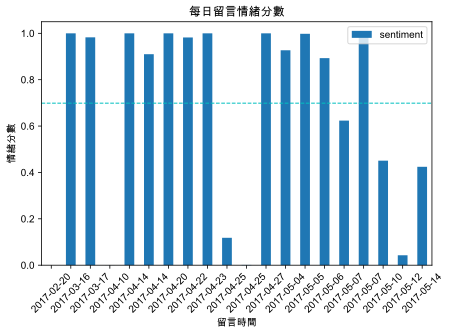

In [11]:
# 繪製每日情緒分數長條圖
dfselect.plot(kind="bar")

plt.axhline(df.sentiment.mean(), color='c', linestyle='dashed', linewidth=1) 
plt.xticks(range(len(dfselect.index)), [x.strftime("%Y-%m-%d") for x in dfselect.index], rotation=45)
plt.ylabel("情緒分數")
plt.title("每日留言情緒分數")
plt.tight_layout()
plt.show()


 ### 每月平均情緒分數

In [13]:
# 按月份計算平均情緒分數
dfselect1 = df[["留言時間", "sentiment"]].set_index("留言時間").resample("ME").mean()
dfselect1


,sentiment
留言時間,
2017-02-28,6.334066e-08
2017-03-31,9.913756e-01
2017-04-30,6.679591e-01
2017-05-31,7.247917e-01


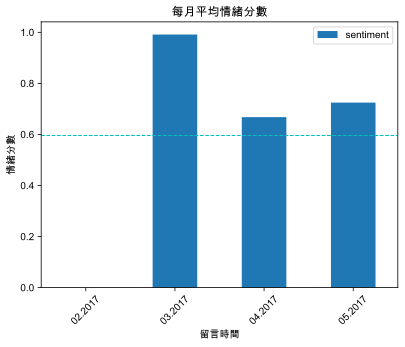

In [14]:
# 繪製每月平均情緒分數長條圖
dfselect1.plot(kind="bar")
plt.axhline(dfselect1.sentiment.mean(), color='c', linestyle='dashed', linewidth=1) 
plt.xticks(range(len(dfselect1.index)), [x.strftime("%m.%Y") for x in dfselect1.index], rotation=45)
plt.ylabel("情緒分數")
plt.title("每月平均情緒分數")
plt.show()


 ### 情緒評分最高與最低的留言

In [15]:
# 找出評價最差的一筆（情緒分數最低）
worst_review = df.sort_values(by='sentiment', ascending=True).iloc[0]
worst_score = worst_review['sentiment']
worst_content = worst_review["留言內容"]

# 找出評價最好的一筆（情緒分數最高）
best_review = df.sort_values(by='sentiment', ascending=False).iloc[0]
best_score = best_review['sentiment']
best_content = best_review["留言內容"]

# 顯示結果
print(f"評價最差留言 (情緒分數: {worst_score:.4f})：")
print(worst_content)

print(f"\n評價最好留言 (情緒分數: {best_score:.4f})：")
print(best_content)


評價最差留言 (情緒分數: 0.0000)：
这次是在情人节当天过去的，以前从来没在情人节正日子出来过，不是因为没有男朋友，而是感觉哪哪人都多，所以特意错开，这次实在是馋A餐厅了，所以赶在正日子也出来了，从下午四点多的时候我看排号就排到一百多了，我从家开车过去得堵的话一个小时，我一看提前两个小时就在网上先排着号了，差不多我们是六点半到的，到那的时候我看号码前面还有才三十多号，我想着肯定没问题了，等一会就能吃上的，没想到悲剧了，就从我们到那坐到等位区开始，大约是十分二十分一叫号，中途多次我都想走了，哈哈，哎，等到最后早上九点才吃上的，服务员感觉也没以前清闲时周到了，不过这肯定的，一人负责好几桌，今天节日这么多人，肯定是很累的，所以大多也都是我自己跑腿，没让服务员给弄太多，就虾滑让服务员下的，然后环境来说感觉卫生方面是不错，就是有些太吵了，味道还是一如既往的那个味道，不过A餐厅最人性化的就是看我们等了两个多小时，上来送了我们一张打折卡，而且当次就可以使用，这点感觉还是挺好的，不愧是A餐厅，就是比一般的要人性化，不过这次就是选错日子了，以后还是得提前预约，要不就别赶节日去，太火爆了！

評價最好留言 (情緒分數: 1.0000)：
大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久没吃A餐厅了，发现很多肉的价钱确实是不便宜，底料也都是很全面的，锅底点了四种，商家很聪明，为了怕锅底沸了串味，就那个白萝卜挡在锅底的拼缝中间，真的是很聪明，最爱吃的还是番茄锅底，菌汤也很好喝，但选了一个麻辣锅来涮鸭血、鸭舌，麻辣可以有效地来调和鸭肉的腥味。中途工作人员推着蛋糕过来唱生日歌送祝福，还为我们布置了生日快乐我的房间，摆了气球，真的是让老人家很感动也很开心，真的很赞！


 ## 練習：每日與每月正向/負向情緒分析與視覺化

In [16]:
# 將情緒分數分為正向和負向 (閾值設為0.5)
df["情緒類別"] = df["sentiment"].apply(lambda x: "正向" if x >= 0.5 else "負向")


In [17]:
# 每日正向與負向情緒數量
daily_sentiment = df.groupby([df["留言時間"].dt.date, "情緒類別"]).size().unstack().fillna(0)
daily_sentiment.columns.name = None
daily_sentiment.head()


,正向,負向
留言時間,,
2017-02-20,0.0,1.0
2017-03-16,1.0,0.0
2017-03-17,1.0,0.0
2017-04-10,0.0,1.0
2017-04-14,2.0,0.0


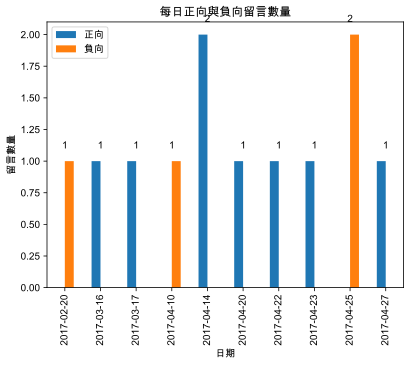

In [18]:
# 繪製每日正向與負向情緒數量長條圖 (前10天)
daily_sentiment.head(10).plot(kind="bar")
plt.xlabel("日期")
plt.ylabel("留言數量")
plt.title("每日正向與負向留言數量")

# 新增數值標籤
for i, v in enumerate(daily_sentiment.head(10).values):
    for j, val in enumerate(v):
        if val > 0:  # 只顯示大於0的標籤
            plt.text(i, val + 0.1, f"{int(val)}", ha='center')

plt.show()


In [19]:
# 每月正向與負向情緒數量
monthly_sentiment = df.groupby([df["留言時間"].dt.to_period("M"), "情緒類別"]).size().unstack().fillna(0)
monthly_sentiment.index = monthly_sentiment.index.astype(str)
monthly_sentiment.columns.name = None
monthly_sentiment


,正向,負向
留言時間,,
2017-02,0.0,1.0
2017-03,2.0,0.0
2017-04,6.0,3.0
2017-05,11.0,4.0


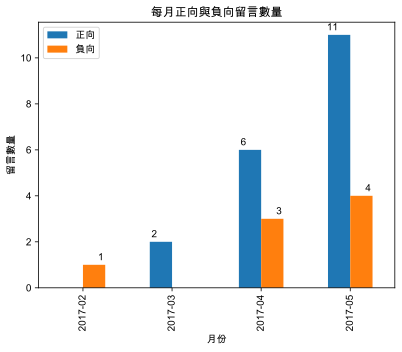

In [27]:
# 繪製每月正向與負向情緒數量長條圖
monthly_sentiment.plot(kind="bar")
plt.xlabel("月份")
plt.ylabel("留言數量")
plt.title("每月正向與負向留言數量")

# 新增數值標籤
for i, v in enumerate(monthly_sentiment.values):
    for j, val in enumerate(v):
        if val > 0:  # 只顯示大於0的標籤
            plt.text(i - 0.2 + j * 0.4, val + 0.2, f"{int(val)}", ha='center')

plt.show()


 ## 練習：PTT 運動內衣資料留言情緒分析

In [29]:
# 載入 PTT 運動內衣資料
ptt_df = pd.read_csv("data/PTT_運動內衣_onepage資料留言內容.csv")
ptt_df.head()


,Unnamed: 0,type,user,content,ipdatetime
0,0,推,yalisa61037,美美的,02/23 23:52
1,1,推,wenyu66,真的都很美欸 不能再看了嗚嗚嗚 好想買,02/24 00:23
2,2,推,sd929598,感覺穿起來會刺刺的,02/24 01:27
3,3,推,mocc,*\(^o^)/*,02/24 09:23
4,4,推,Valentine17,樓樓上sd 大 莎露的蕾絲真的穿起來不會刺！這大概也,02/24 12:15


In [31]:
# 計算情緒分數
ptt_df["sentiment"] = ptt_df["content"].apply(lambda x: SnowNLP(str(x)).sentiments)
ptt_df["情緒類別"] = ptt_df["sentiment"].apply(lambda x: "正向" if x >= 0.5 else "負向")


In [32]:
# 1. 計算全部筆數，總留言平均情緒
total_count = len(ptt_df)
avg_sentiment = ptt_df["sentiment"].mean()

print(f"全部筆數: {total_count}")
print(f"總留言平均情緒: {avg_sentiment:.4f}")


全部筆數: 110
總留言平均情緒: 0.4512


In [33]:
# 2. 計算正向情緒筆數、正向留言平均數
positive_df = ptt_df[ptt_df["情緒類別"] == "正向"]
positive_count = len(positive_df)
positive_avg = positive_df["sentiment"].mean()

print(f"正向情緒筆數: {positive_count}")
print(f"正向留言平均數: {positive_avg:.4f}")


正向情緒筆數: 51
正向留言平均數: 0.8064


In [34]:
# 3. 計算負向情緒筆數、負向留言平均數
negative_df = ptt_df[ptt_df["情緒類別"] == "負向"]
negative_count = len(negative_df)
negative_avg = negative_df["sentiment"].mean()

print(f"負向情緒筆數: {negative_count}")
print(f"負向留言平均數: {negative_avg:.4f}")


負向情緒筆數: 59
負向留言平均數: 0.1441


In [36]:
# 4. 最佳留言情緒分數，留言內容
best_ptt = ptt_df.sort_values(by='sentiment', ascending=False).iloc[0]
best_ptt_score = best_ptt['sentiment']
best_ptt_content = best_ptt["content"]

print(f"最佳留言情緒分數: {best_ptt_score:.4f}")
print(f"留言內容: {best_ptt_content}")


最佳留言情緒分數: 0.9977
留言內容: 粉色的好美好春天


In [38]:
# 5. 最差留言情緒分數，留言內容
worst_ptt = ptt_df.sort_values(by='sentiment', ascending=True).iloc[0]
worst_ptt_score = worst_ptt['sentiment']
worst_ptt_content = worst_ptt["content"]

print(f"最差留言情緒分數: {worst_ptt_score:.4f}")
print(f"留言內容: {worst_ptt_content}")

最差留言情緒分數: 0.0001
留言內容: 會翹的放著冬天衣服比較多層時再穿，先換適合的
